<font color='maroon' size=5A face="black body"> Get cleaned data </font>



In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [21]:
from helper import TelecomHelper
from plots import *


<br/><font color='gold' size=7A face="black body"> User Engagement analysis </font><br/><br/>
<p> <font color='maroon' size=6A face="black body"> Sub tasks perform the following tasks </font></p>
    <ul>
    <li>Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric</li>
    <li>Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement.</li>
    <li>Compute the minimum, maximum, average & total non- normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings</li>
    <li>Aggregate user total traffic per application and derive the top 10 most engaged users per application</li>
    <li>Plot the top 3 most used applications using appropriate charts. </li>
    <li>Using k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics:</li>
    </ul>

In [4]:
CSV_PATH = "../data/cleaned_df.csv"

In [5]:

TelecomHelper = TelecomHelper()

In [6]:
df = TelecomHelper.read_csv(CSV_PATH)

file read as csv


In [7]:
renamed_df = df.rename(columns={'msisdn/number': 'msisdn', 'dur._(ms)': 'duration' })

In [8]:
agg_by_session_count = renamed_df.groupby('msisdn').agg({'bearer_id': 'count'})
session_freq_metrics = agg_by_session_count.sort_values(by=['bearer_id'], ascending = False)
session_freq_metrics.head(10)

,bearer_id
msisdn,
3.362632e+10,18
3.361489e+10,17
3.362578e+10,17
3.365973e+10,16
3.367588e+10,15
3.376054e+10,15
3.366716e+10,13
3.360313e+10,12
3.376041e+10,12


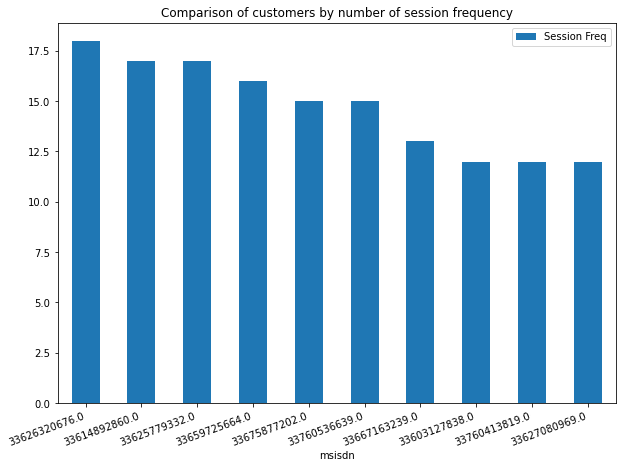

In [9]:
ax = session_freq_metrics.rename(columns={'bearer_id': 'Session Freq'}).head(10).plot.bar(
    y=['Session Freq'], 
    title="Comparison of customers by number of session frequency",
    figsize=(10,7))
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
plt.show()

In [10]:
agg_by_duration = renamed_df.groupby('msisdn').agg({'duration': 'sum'})
duration_metrics = agg_by_duration.sort_values(by=['duration'], ascending = False)
duration_metrics.head(10)

,duration
msisdn,
3.362578e+10,18553754.0
3.361489e+10,9966898.0
3.376054e+10,9279434.0
3.362632e+10,8791927.0
3.366716e+10,8744914.0
3.366469e+10,6288730.0
3.360313e+10,6287761.0
3.366746e+10,5649882.0
3.376041e+10,5321667.0


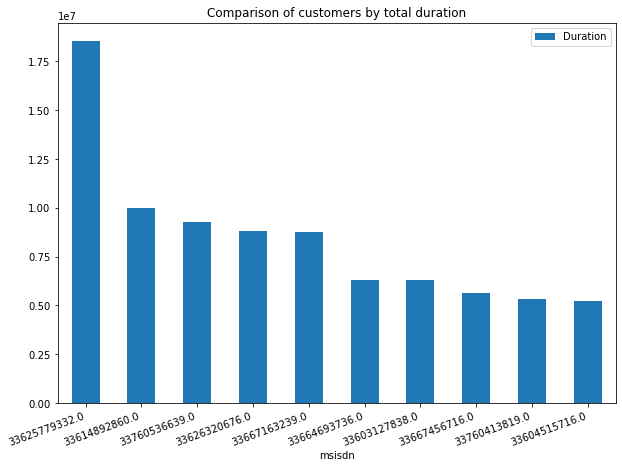

In [11]:
# plot a bar chart of the top 10 customers by duration
ax = duration_metrics.rename(columns={'duration': 'Duration'}).head(10).plot.bar(
    y=['Duration'],
    title="Comparison of customers by total duration",
    figsize=(10,7))
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
plt.show()

In [12]:
agg_by_data = renamed_df.groupby('msisdn').agg({'total_data': 'sum'})
traffic_metric = agg_by_data.sort_values(by=['total_data'], ascending = False)
traffic_metric.head(10)

,total_data
msisdn,
3.361489e+10,8.846226e+09
3.376054e+10,8.514774e+09
3.362578e+10,8.499621e+09
3.362632e+10,7.971167e+09
3.367588e+10,7.891111e+09
3.365973e+10,7.705863e+09
3.366646e+10,7.308501e+09
3.376041e+10,7.132371e+09
3.366471e+10,6.872018e+09


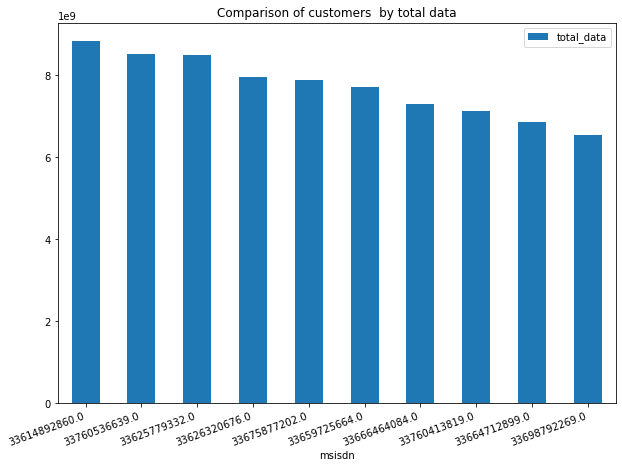

In [13]:
ax = traffic_metric.head(10).plot.bar(
    y=['total_data'], 
    title="Comparison of customers  by total data",
    figsize=(10,7))
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
plt.show()

#### Normalize each engagement metric and run a k-means (k=3) to classify customers in three groups of engagement.


In [14]:

engagment_metrics = renamed_df.groupby('msisdn').agg({'bearer_id': 'count','duration': 'sum', 'total_data': 'sum',})
engagment_metrics = engagment_metrics.rename(columns={'bearer_id': 'sessions_frequency', 'total_data': 'total_traffic'})
engagment_metrics.sort_values(by=['sessions_frequency'], ascending=False).head(10)

                                  

,sessions_frequency,duration,total_traffic
msisdn,,,
3.362632e+10,18,8791927.0,7.971167e+09
3.361489e+10,17,9966898.0,8.846226e+09
3.362578e+10,17,18553754.0,8.499621e+09
3.365973e+10,16,4035428.0,7.705863e+09
3.367588e+10,15,4865947.0,7.891111e+09
3.376054e+10,15,9279434.0,8.514774e+09
3.366716e+10,13,8744914.0,5.618394e+09
3.360313e+10,12,6287761.0,4.976195e+09
3.376041e+10,12,5321667.0,7.132371e+09


In [16]:
# create an object called helperTelecom from TelecomHelper class
helperTelecom = TelecomHelper

In [17]:

cleaned_engagment_metrics = helperTelecom.handle_outliers(engagment_metrics, 'sessions_frequency')
cleaned_engagment_metrics = helperTelecom.handle_outliers(cleaned_engagment_metrics, 'duration')
cleaned_engagment_metrics = helperTelecom.handle_outliers(cleaned_engagment_metrics, 'total_traffic')
cleaned_engagment_metrics.describe()

,sessions_frequency,duration,total_traffic
count,105719.000000,105719.000000,1.057190e+05
mean,1.356634,130349.580378,6.622830e+08
std,0.650007,87018.309018,3.947117e+08
min,1.000000,7142.000000,3.324901e+07
25%,1.000000,72729.000000,3.579501e+08
50%,1.000000,103111.000000,6.169335e+08
75%,2.000000,172799.000000,8.564738e+08
max,3.500000,322904.000000,1.604259e+09


In [18]:
normalized_metrics = helperTelecom.normalizer(cleaned_engagment_metrics, ['sessions_frequency', 'duration', 'total_traffic'])
normalized_metrics.describe()


,sessions_frequency,duration,total_traffic
count,1.057190e+05,105719.000000,1.057190e+05
mean,2.837243e-09,0.000281,9.999999e-01
std,2.272614e-09,0.000320,3.560448e-07
min,1.051789e-09,0.000008,9.999808e-01
25%,1.494117e-09,0.000112,9.999999e-01
50%,2.052769e-09,0.000195,1.000000e+00
75%,3.142538e-09,0.000319,1.000000e+00
max,3.007606e-08,0.006194,1.000000e+00


<Figure size 648x504 with 0 Axes>

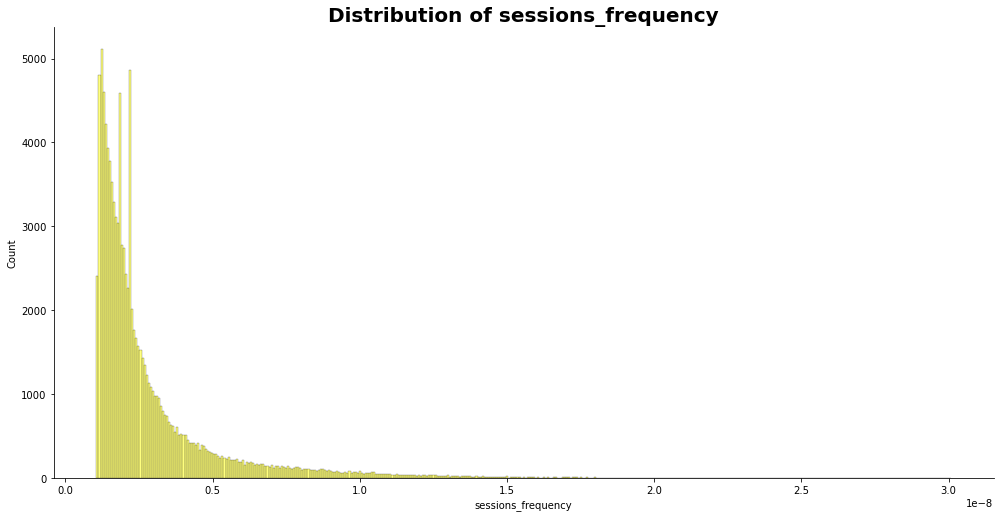

In [22]:

plot_hist(normalized_metrics, 'sessions_frequency', 'yellow')

<Figure size 648x504 with 0 Axes>

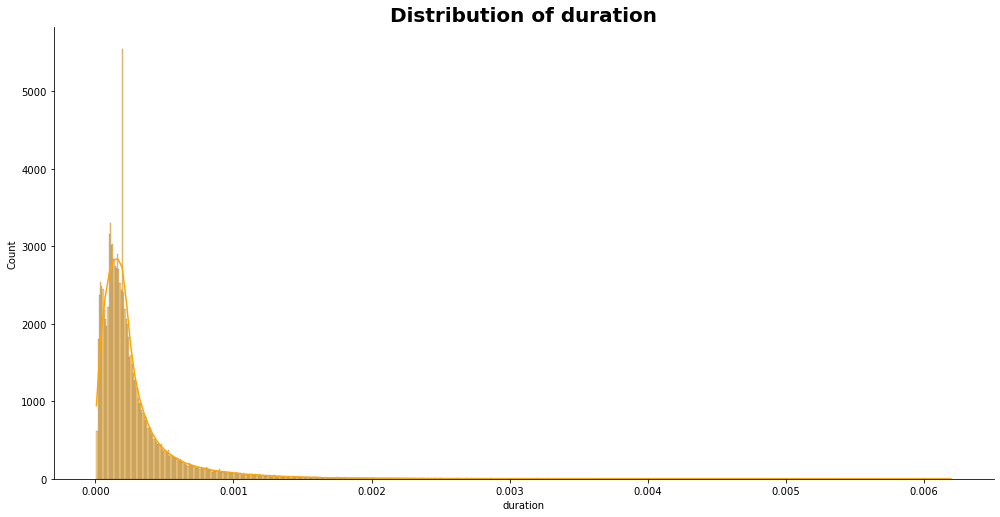

In [23]:
plot_hist(normalized_metrics, 'duration', 'orange')


<Figure size 648x504 with 0 Axes>

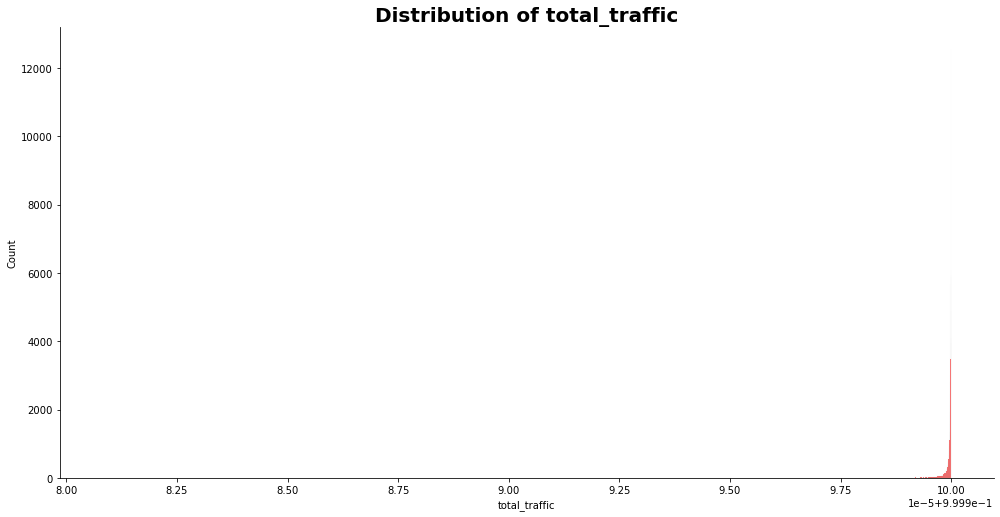

In [24]:
plot_hist(normalized_metrics, 'total_traffic', 'red')


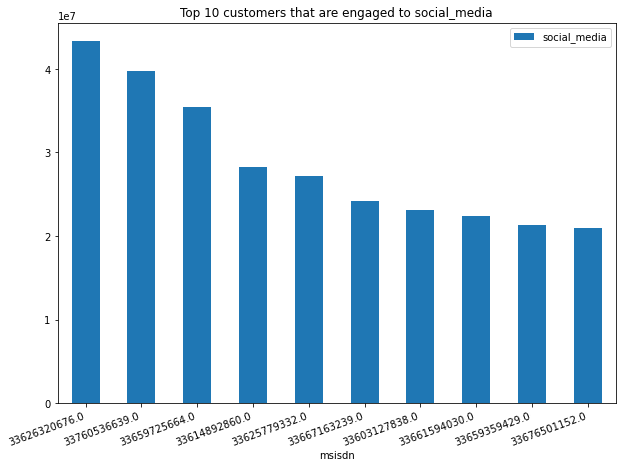

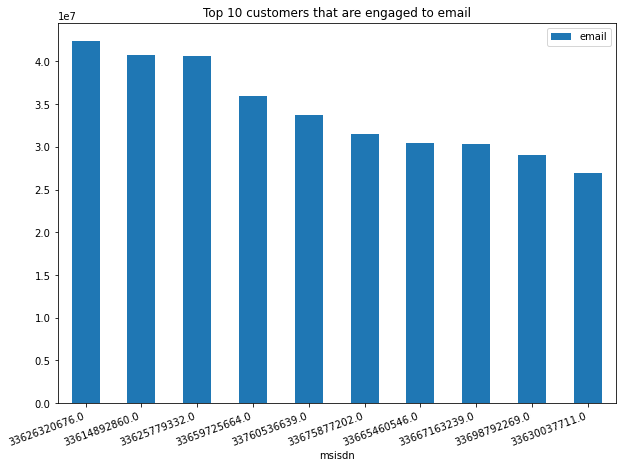

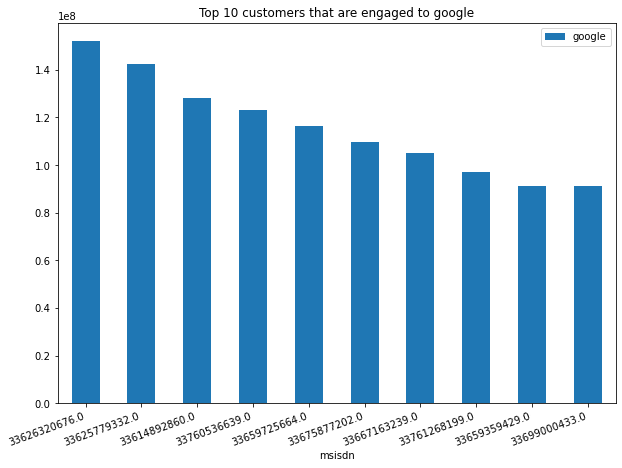

In [25]:
app_cols = ['social_media', 'email', 'google']

for app in app_cols:
    
    app_agg = renamed_df.groupby('msisdn').agg({app : 'sum'})
    top_app_users = app_agg.sort_values(by=[app], ascending=False).head(10)
    ax = top_app_users.plot.bar(
        y=[app], 
        title=f"Top 10 customers that are engaged to {app}",
        figsize=(10,7))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
    plt.show()

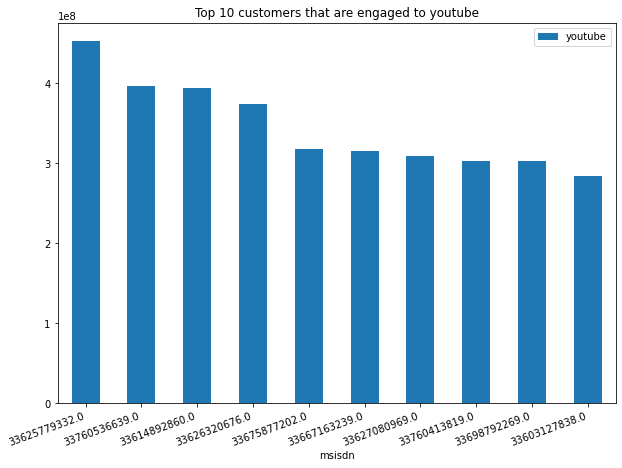

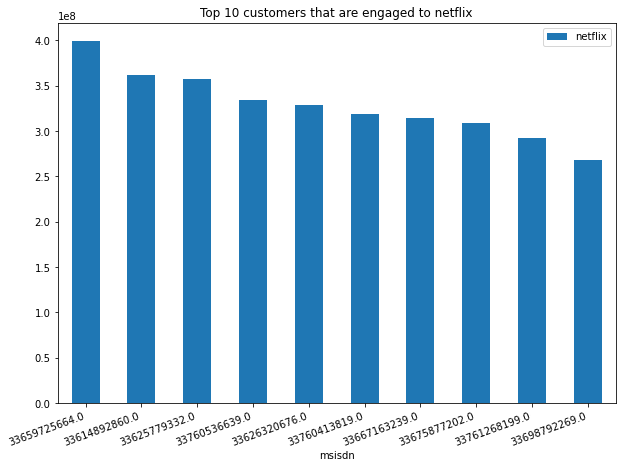

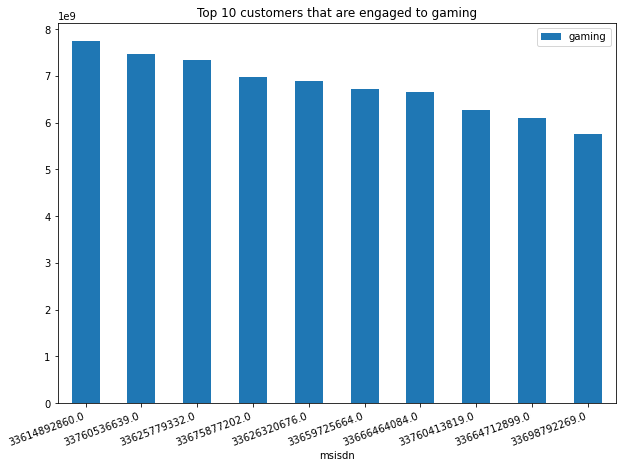

In [26]:
app_cols = ['youtube', 'netflix', 'gaming']

for app in app_cols:
    
    app_agg = renamed_df.groupby('msisdn').agg({app : 'sum'})
    top_app_users = app_agg.sort_values(by=[app], ascending=False).head(10)
    ax = top_app_users.plot.bar(
        y=[app], 
        title=f"Top 10 customers that are engaged to {app}",
        figsize=(10,7))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
    plt.show()

In [ ]:
normalized_metrics = hnormalizer(cleaned_engagment_metrics, ['sessions_frequency', 'duration', 'total_traffic'])

kmeans = KMeans(n_clusters=3, init='k-means++').fit(normalized_metrics)
pred = kmeans.predict(normalized_metrics)

engagment_metrics_with_cluster = cleaned_engagment_metrics.copy()
engagment_metrics_with_cluster['clusters'] = pred
